# 02 - Kernel methods and SVMs
** APSTA - Ecole Centrale Nantes **

** Diana Mateus **





PARTICIPANTS: **Chaitanya Krishna VIRIYALA, Pierre**

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
import random


from skimage.color import rgb2gray
from skimage.transform import resize

from sklearn.svm import SVC
from sklearn.utils import shuffle


# 1. Image classification on Caltech 101 with SVMs

**a)** Download images from either the following sites:

- http://www.vision.caltech.edu/feifeili/Datasets.htm
- https://box.ec-nantes.fr:443/index.php/s/3TDnc5aGt4QMdKS

and run the code bellow to check the proper file location and store the name of the classes in the list ```labelNamesAll```

(Run and fix paths if needed)

In [20]:
IMDIR = '101_ObjectCategories/'
labelNamesAll = []

for root, dirnames, filenames in os.walk(IMDIR):
    labelNamesAll.append(dirnames)
    #uncomment if you need to check what is found in this folder
    #for filename in filenames:
        #f = os.path.join(root, filename)
        #if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
        #    print(f)

labelNamesAll = labelNamesAll[0]

#The list of all labels/directories is
print(labelNamesAll)

['gerenuk', 'hawksbill', 'headphone', 'ant', 'butterfly', 'lamp', 'strawberry', 'water_lilly', 'chandelier', 'dragonfly', 'crab', 'pagoda', 'dollar_bill', 'emu', 'inline_skate', 'platypus', 'dalmatian', 'cup', 'airplanes', 'joshua_tree', 'cougar_body', 'grand_piano', 'trilobite', 'brontosaurus', 'wild_cat', 'pigeon', 'dolphin', 'soccer_ball', 'wrench', 'scorpion', 'flamingo_head', 'nautilus', 'accordion', 'cougar_face', 'pyramid', 'camera', 'barrel', 'schooner', 'cellphone', 'panda', 'revolver', 'lobster', 'menorah', 'lotus', 'stapler', 'crocodile', 'chair', 'helicopter', 'minaret', 'starfish', 'ceiling_fan', 'ketch', 'mayfly', 'wheelchair', 'bass', 'yin_yang', 'crocodile_head', 'saxophone', 'beaver', 'mandolin', 'bonsai', 'Leopards', 'car_side', 'ibis', 'electric_guitar', 'kangaroo', 'stegosaurus', 'ferry', 'snoopy', 'umbrella', 'rhino', 'okapi', 'watch', 'brain', 'gramophone', 'scissors', 'rooster', 'cannon', 'binocular', 'anchor', 'octopus', 'buddha', 'laptop', 'windsor_chair', 'hed

**b. Build a reduced dataset for accelerating process.** To do so: 
- Consider only up to $K$ randomly drawn categories (start with a binary case)
- Read only up to $N$ images for each class
- Resize the images to $(imWidth*imHeight)$

The dataset should consist of a 
- Input matrix $\mathbf{X}$ of size $(K\cdot N)\times (imWidth\cdot imHeight)$ with one image in every row of the matrix. 
- Output vector $\mathbf{y}$ of size $(K\cdot N)\times 1$ with the label index of each input point in $\bf X$.
- the reduced list of the label names of size $K$ to map between the indices and the names.

**Note than different classes may have different number of images so that the actual number of $\bf X$ and $\bf y$ is maybe less than $K*N$**

(Run and understand)

In [21]:
#build DATASET from K categories and (up to) N images from category
K = 2
N = 40
imWidth = 100
imHeight = 100

#selection of label indices
X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row
#Y = np.zeros([K*N,1]) #label indices
Y = -np.ones([K*N,1]) #label indices
labelNames = []

#random.seed(a=42) Uncomment if you want to reproduce the same results each time

globalCount = 0

# For a reduced number of classes K
for i in range(K): 
    
    #Randomly choose the class
    while True:
        lab = random.randint(0,len(labelNamesAll)-1)
        if lab not in labelNames:
            break
            
    #folders are named after the class label so we can build the path to the images with lab
    filedir = os.path.join(IMDIR,labelNamesAll[lab])
    print(filedir)

    #save the name of the chosen classes in a list
    labelNames.append(labelNamesAll[lab])       

    #Add data to the X and Y matrices
    classCount = 0
    for filename in os.listdir(filedir):
        f = os.path.join(filedir, filename)

        #Keep only up to N images per class
        if f.endswith(('.jpg')) and (classCount < N):
            image = skimage.io.imread(f, as_gray=True)
            image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')
            X[globalCount,:] = image.flatten()
            Y[globalCount,:] = i
            globalCount += 1
            classCount += 1

#Remove the unused entries of X and Y
print(globalCount)
X = X[:globalCount,:]
Y = Y[:globalCount,:]

#Check the stored classes
print(labelNames)
print(X.shape)
print(Y.T)


101_ObjectCategories/scorpion
101_ObjectCategories/crayfish
80
['scorpion', 'crayfish']
(80, 10000)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]]


**c. Split the dataset into train (80% of samples) and test (20% samples). ** (Fill in and print the sizes of X_train, X_test, and the values of Y_train and Y_test)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2,random_state=3)

print('Shape of X_train is :',X_train.shape)
print('\nSize X_train:', X_train.size)
print('\nShape of X_test is :',X_test.shape)
print('\nSize X_test:', X_test.size)
print('Shape of y_train is :',Y_train.shape)
print("\nY_train :\n", Y_train.T)
print('Shape of y_test is :',Y_test.shape)
print("\nY_test :\n",Y_test.T)

Shape of X_train is : (64, 10000)

Size X_train: 640000

Shape of X_test is : (16, 10000)

Size X_test: 160000
Shape of y_train is : (64, 1)

Y_train :
 [[1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
  1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.]]
Shape of y_test is : (16, 1)

Y_test :
 [[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]]


**d) Create an SVC model, train it on the train set, and test it on the test set**. 
(Print the ground truth values and also the predictions and count the number of errors)

In [23]:
print('---Linear Kernel---\n')

# Create, train and test an svm model     
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

# Compare the ground truth vs the predicted values
print("True classes",Y_test.T)
print("Predictions",Y_pred)

# count the number of errors
errors = np.sum((Y_test.ravel()!=Y_pred))
print('There were ', errors, 'errors')

print('\n\n---RBF kernel---\n')

# Create, train and test an svm model     
svc = SVC(kernel = 'rbf')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

# Compare the ground truth vs the predicted values
print("True classes",Y_test.T)
print("Predictions",Y_pred)

# count the number of errors
errors = np.sum((Y_test.ravel()!=Y_pred))
print('There were ', errors, 'errors')

print('\n\n---Sigmoid Kernel---')

# Create, train and test an svm model     
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

# Compare the ground truth vs the predicted values
print("True classes",Y_test.T)
print("Predictions",Y_pred)

# count the number of errors
errors = np.sum((Y_test.ravel()!=Y_pred))
print('There were ', errors, 'errors')


print('\n\n---Poly Kernel---')

# Create, train and test an svm model     
svc = SVC(kernel = 'poly')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

# Compare the ground truth vs the predicted values
print("True classes",Y_test.T)
print("Predictions",Y_pred)

# count the number of errors
errors = np.sum((Y_test.ravel()!=Y_pred))
print('There were ', errors, 'errors')

---Linear Kernel---

True classes [[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]]
Predictions [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
There were  4 errors


---RBF kernel---

True classes [[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]]
Predictions [1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
There were  7 errors


---Sigmoid Kernel---


/Users/chaitanyaviriyala/anaconda3/envs/testfordlib/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/chaitanyaviriyala/anaconda3/envs/testfordlib/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/chaitanyaviriyala/anaconda3/envs/testfordlib/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


True classes [[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]]
Predictions [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
There were  9 errors


---Poly Kernel---
True classes [[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]]
Predictions [1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
There were  7 errors


/Users/chaitanyaviriyala/anaconda3/envs/testfordlib/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**By testing SVCs with different kernels, we can see the variability in the accuracy of the prediction. Also, the best performing kernel is not always the same depending on the dataset.**

**e) Question** SVMs are intrinsically binary classifiers, can you train the SVC for K>2? How is that achieved?

**This is possible by applying a one vs. all in which we use K classifier (one per class), each classifier determining whether or not it belongs to a class. You can also use a one vs. one, in which we use $\sum_{i=1}^K i$ classifiers (one for each pair of classes) and we look for each image in which class it was most often classified.**


**f) Show the test images as well as the the predictions (Y_pred) vs the ground truth (Y_gt) labels for the best model**
(Run for different set-ups)

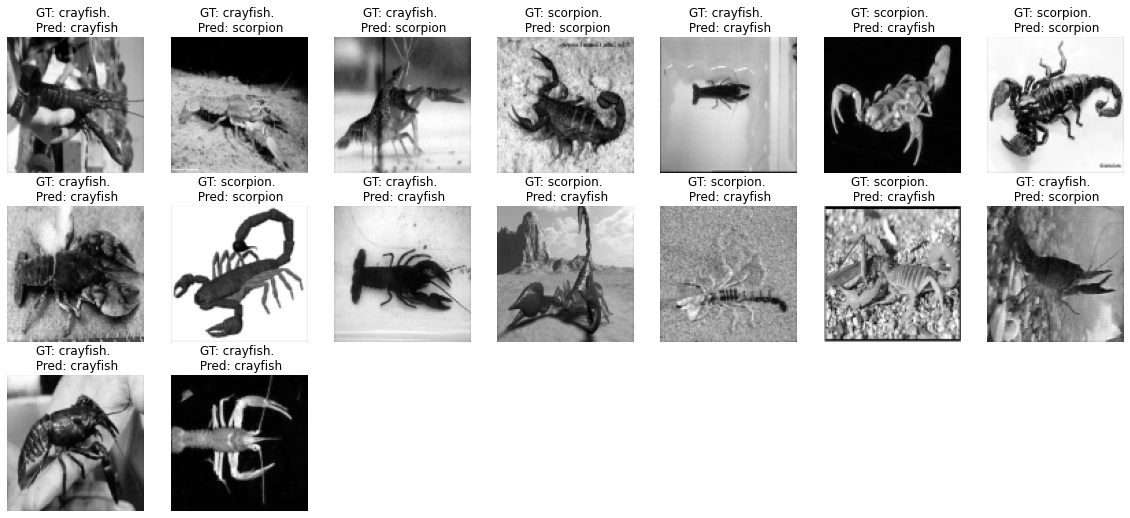

In [24]:
# Show some results
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()
imCounter = 1
for i in range(len(Y_test)):
    image=np.reshape(X_test[i,:], (imHeight,imWidth)) 

    plt.subplot(5,7,imCounter)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    gtLabel = labelNames[Y_test.ravel()[i].astype(int)]
    predLabel = labelNames[Y_pred.ravel()[i].astype(int)]
    plt.title('GT: {}. \n Pred: {}'.format(gtLabel, predLabel))

    imCounter += 1
plt.show()



# 2. Evaluation Measures

**a) Fill in the function bellow to computing different evaluation measures and give a performance report**
Look at the formulas and definitions in https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)

Compare your results vs the in-built sklearn measures


Start by computing the confusion matrix values TP, TN, FP, FN
![image](confusion-matrix.png)



In [25]:
# Functions to compute the errors between prediction and ground truth 

def compute_measures(Y_gt,Y_pred, positiveClass=1): #Y_gt = ground truth
    measures = dict()
    Y_len = len(Y_gt)
    
    # True positives TP
    TP = 0
    # True negatives TN
    TN = 0   
    # False positives FP
    FP = 0       
    # False negatives FN
    FN = 0
    
    for i in range(0, len(Y_gt), 1):
        if ((Y_gt[i] == positiveClass) and (Y_pred[i] == positiveClass)):
            TP = TP + 1
        if((Y_gt[i] == positiveClass) and(Y_pred[i] != positiveClass)):
            FN = FN + 1
        if((Y_gt[i] != positiveClass) and (Y_pred[i] == positiveClass)):
            FP = FP + 1
        if((Y_gt[i] != positiveClass)and (Y_pred[i] != positiveClass)):
            TN = TN + 1
            
    print('TP ', TP, 'TN ', TN, 'FP', FP, 'FN', FN, 'Total', TP+TN+FP+FN)
    measures['TP'] = TP
    measures['TN'] = TN
    measures['FP'] = FP
    measures['FN'] = FN
    
    
    # Accuracy
    measures['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
    
    # Precision
    measures['precision'] = TP/(TP+FP)
        
    # Specificity
    measures['specificity']= TN/(TN+FP)
    
    # Recall
    measures['recall'] = TP/(TP+FN)
    
    # F-measure
    measures['f1'] = 2*TP/(2*TP+FP+FN)
    
    # Negative Predictive Value
    measures['npv'] = TN/(TN+FN)
    
    # False Predictive Value
    measures['fpr'] = FP/(FP+TN)
    
    
    return measures




In [26]:
from sklearn.metrics import *

y_gt = Y_test.ravel()
 
print("Sklearn measures:\n")
print('Accuracy ', accuracy_score(y_gt,Y_pred),'\n',
      'Precision', precision_score(y_gt, Y_pred), '\n',
      'Recall', recall_score(y_gt, Y_pred), '\n',
      'F-measure', f1_score(y_gt, Y_pred), '\n')

print("Our results:\n")
measures = compute_measures(y_gt,Y_pred, positiveClass=1)
print('Accuracy ', measures['accuracy'], '\n',
          'Precision', measures['precision'], '\n',
          'Recall', measures['recall'], '\n',
          'Specificity ', measures['specificity'], '\n',
          'F-measure', measures['f1'], '\n',
          'NPV', measures['npv'],'\n',
          'FPV', measures['fpr'],'\n')



Sklearn measures:

Accuracy  0.5625 
 Precision 0.6 
 Recall 0.6666666666666666 
 F-measure 0.631578947368421 

Our results:

TP  6 TN  3 FP 4 FN 3 Total 16
Accuracy  0.5625 
 Precision 0.6 
 Recall 0.6666666666666666 
 Specificity  0.42857142857142855 
 F-measure 0.631578947368421 
 NPV 0.5 
 FPV 0.5714285714285714 



**We note the agreement of our measurements with those provided by sklearn.**

**b) Question:** Explain and implement the two methods to compute the scores for multiple classes $K>2$ ?

**Explanation: The microaveraging method consists in making averages on all the examples while for the macroaveraging method, the calculations are made class by class, then the average of the results obtained for each class is taken.** 




In [27]:
def micro_average(measuresList):
    microAverage = dict()

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(len(measuresList)):
        TP += measuresList[i]['TP']
        TN += measuresList[i]['TN']
        FP += measuresList[i]['FP']
        FN += measuresList[i]['FN']
        
    # Accuracy
    microAverage['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
    
    # Precision
    microAverage['precision'] = TP/(TP+FP)
        
    # Specificity
    microAverage['specificity'] = TN/(TN+FP)
    
    # Recall
    microAverage['recall'] = TP/(TP+FN)
    
    # F-measure
    microAverage['f1'] = 2*TP/(2*TP+FP+FN)
    
    # Negative Predictive Value
    microAverage['npv'] = TN/(TN+FN)
    
    # False Predictive Value
    microAverage['fpr'] = FP/(FP+TN)
    
        
    print('Accuracy ', microAverage['accuracy'], '\n',
          'Precision', microAverage['precision'], '\n',
          'Recall', microAverage['recall'], '\n',
          'Specificity ', microAverage['specificity'], '\n',
          'F-measure', microAverage['f1'], '\n',
          'NPV', microAverage['npv'],'\n',
          'FPV', microAverage['fpr'],'\n')
    
    return microAverage

def macro_average(measuresList):
    macroAverage = dict()
    
    n = len(measuresList)
    acc = 0
    pre = 0
    spec = 0
    rec = 0
    f = 0
    np = 0
    fp = 0
    
    for i in range(n):
        acc+=measuresList[i]['accuracy']
        pre+=measuresList[i]['precision']
        spec+=measuresList[i]['specificity']
        rec+=measuresList[i]['recall']
        f+=measuresList[i]['f1']
        np+=measuresList[i]['npv']
        fp+=measuresList[i]['fpr']
    # Accuracy
    macroAverage['accuracy'] = acc/n
    
    # Precision
    macroAverage['precision'] = pre/n
        
    # Specificity
    macroAverage['specificity']= spec/n
    
    # Recall
    macroAverage['recall'] = rec/n
    
    # F-measure
    macroAverage['f1'] = f/n
    
    # Negative Predictive Value
    macroAverage['npv'] = np/n
    
    # False Predictive Value
    macroAverage['fpr'] = fp/n
    
    print('Accuracy ', macroAverage['accuracy'], '\n',
          'Precision', macroAverage['precision'], '\n',
          'Recall', macroAverage['recall'], '\n',
          'Specificity ', macroAverage['specificity'], '\n',
          'F-measure', macroAverage['f1'], '\n',
          'NPV', macroAverage['npv'],'\n',
          'FPV', macroAverage['fpr'],'\n')
    
    return macroAverage

** c) Measure the performance of the SVC model for multiple classes $K>2$ ** 
Compare your results to those of sklearn metrics

In [28]:
#Fill in a list of measure dictionaries taking as input a different positive class
from sklearn.metrics import classification_report# confusion_matrix, accuracy_score, precision_score, recall_score, f1_micro, f1_macro

multiclass = []
for k in range(K):
    print('\nFor class',labelNames[k])
    multiclass.append(compute_measures(Y_test.ravel(),Y_pred, positiveClass=k))

print('\n---Macro-average---')

print('\nOur measures:')
macro_average(multiclass)
    
print('\nSklearn measures:')
print('Accuracy ', accuracy_score(y_gt,Y_pred),'\n',
      'Precision', precision_score(y_gt, Y_pred,average='macro'), '\n',
      'Recall', recall_score(y_gt, Y_pred,average='macro'), '\n',
      'F-measure', f1_score(y_gt, Y_pred,average='macro'), '\n')




print('\n---Micro-average---')
micro_average(multiclass)

print('Accuracy ', accuracy_score(y_gt,Y_pred),'\n',
      'Precision', precision_score(y_gt, Y_pred,average='micro'), '\n',
      'Recall', recall_score(y_gt, Y_pred,average='micro'), '\n',
      'F-measure', f1_score(y_gt, Y_pred,average='micro'), '\n')


For class scorpion
TP  3 TN  6 FP 3 FN 4 Total 16

For class crayfish
TP  6 TN  3 FP 4 FN 3 Total 16

---Macro-average---

Our measures:
Accuracy  0.5625 
 Precision 0.55 
 Recall 0.5476190476190476 
 Specificity  0.5476190476190476 
 F-measure 0.5465587044534412 
 NPV 0.55 
 FPV 0.45238095238095233 


Sklearn measures:
Accuracy  0.5625 
 Precision 0.55 
 Recall 0.5476190476190476 
 F-measure 0.5465587044534412 


---Micro-average---
Accuracy  0.5625 
 Precision 0.5625 
 Recall 0.5625 
 Specificity  0.5625 
 F-measure 0.5625 
 NPV 0.5625 
 FPV 0.4375 

Accuracy  0.5625 
 Precision 0.5625 
 Recall 0.5625 
 F-measure 0.5625 



# 3. Hyperparameter tuning 

Do a systematic evaluation of the performance of your SVC for different model hyperparameters (C, and $\gamma$). Choose the by optimizing the F1 measure parameters on a **validation** set (different from train and test). Present and discuss your findings for different number of classes and numbers of images. THIS IS THE MOST IMPORTANT PART FOR THE EVALUATION. 

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [16]:
param_grid = {'gamma': [1000,100,10,1,1e-1,1e-2,1e-3, 1e-4],
                     'C': [1000,100,10,1,1e-1,1e-2,1e-3, 1e-4]}

**The adjustment of the hyperparameters is carried out by optimizing the F-measure (evaluated by the * k-fold * method) on a grid of the hyperparameters $ C $ and $ \ gamma $.**

In [17]:
def tuning(X,Y,param_grid,k=5):
    Y = Y.ravel()
    kf = KFold(k)
    tab_score_av = np.zeros((len(param_grid['C']),len(param_grid['gamma']))) # Tableau des scores moyens pour chaque couple de paramètres 

    for i in range(len(param_grid['C'])):
        for j in range(len(param_grid['gamma'])):
            tab_score = [] # Tableau des scores chaque échantillon de validation 
            for train_index, val_index in kf.split(X):
                C = param_grid['C'][i]
                gamma = param_grid['gamma'][j]
                svc = SVC(C=C,kernel = 'rbf',gamma=gamma)
                X_train, X_val = X[train_index], X[val_index]
                Y_train, Y_val = Y[train_index], Y[val_index]

                svc.fit(X_train,Y_train)

                Y_pred = svc.predict(X_val)
                tab_score.append(f1_score(Y_val, Y_pred,average='macro'))
            tab_score_av[i,j] = np.mean(tab_score)
    return(np.where(tab_score_av==np.max(tab_score_av)))

In [18]:
for K in range(2,6):
    for N in [10,20,40,60]:
        #build DATASET from K categories and (up to) N images from category
        imWidth = 100
        imHeight = 100

        #selection of label indices
        X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row
        #Y = np.zeros([K*N,1]) #label indices
        Y = -np.ones([K*N,1]) #label indices
        labelNames = []

        #random.seed(a=42) Uncomment if you want to reproduce the same results each time

        globalCount = 0

        # For a reduced number of classes K
        for i in range(K): 

            #Randomly choose the class
            while True:
                lab = random.randint(0,len(labelNamesAll)-1)
                if lab not in labelNames:
                    break

            #folders are named after the class label so we can build the path to the images with lab
            filedir = os.path.join(IMDIR,labelNamesAll[lab])

            #save the name of the chosen classes in a list
            labelNames.append(labelNamesAll[lab])       

            #Add data to the X and Y matrices
            classCount = 0
            for filename in os.listdir(filedir):
                f = os.path.join(filedir, filename)

                #Keep only up to N images per class
                if f.endswith(('.jpg')) and (classCount < N):
                    image = skimage.io.imread(f, as_gray=True)
                    image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')
                    X[globalCount,:] = image.flatten()
                    Y[globalCount,:] = i
                    globalCount += 1
                    classCount += 1

        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=3)
        
        tune = tuning(X_train,Y_train,param_grid)
    
        print('Best parameters with {} classes and {} images/class\n'.format(K,N))
        print('C = ',param_grid['C'][tune[0][0]])
        print('gamma = ',param_grid['gamma'][tune[1][0]],'\n')

Best parameters with 2 classes and 10 images/class

C =  1000
gamma =  0.0001 

Best parameters with 2 classes and 20 images/class

C =  1000
gamma =  0.001 

Best parameters with 2 classes and 40 images/class

C =  1000
gamma =  0.001 

Best parameters with 2 classes and 60 images/class

C =  10
gamma =  0.0001 

Best parameters with 3 classes and 10 images/class

C =  1000
gamma =  0.001 

Best parameters with 3 classes and 20 images/class

C =  1000
gamma =  0.001 

Best parameters with 3 classes and 40 images/class

C =  10
gamma =  0.0001 

Best parameters with 3 classes and 60 images/class

C =  1000
gamma =  0.0001 

Best parameters with 4 classes and 10 images/class

C =  1000
gamma =  0.001 

Best parameters with 4 classes and 20 images/class

C =  10
gamma =  0.0001 

Best parameters with 4 classes and 40 images/class

C =  10
gamma =  0.001 

Best parameters with 4 classes and 60 images/class

C =  1000
gamma =  0.001 

Best parameters with 5 classes and 10 images/class

C =

**We perform the hyperparameter search for different numbers of classes and images per class. Note that the optimal hyperparameters vary depending on the size of the dataset and the number of classes.**